In [1]:
!wget "https://media.githubusercontent.com/media/pradeep-016/ML_Course/refs/heads/main/3)%20Clustering%20Models/Hierarchical%20Clustering/segmentation%20data.csv"

--2024-12-02 15:35:01--  https://media.githubusercontent.com/media/pradeep-016/ML_Course/refs/heads/main/3)%20Clustering%20Models/Hierarchical%20Clustering/segmentation%20data.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61519 (60K) [text/plain]
Saving to: ‘segmentation data.csv’

segmentation data.c 100%[===================>]  60.08K  --.-KB/s    in 0.01s   

2024-12-02 15:35:01 (4.55 MB/s) - ‘segmentation data.csv’ saved [61519/61519]



In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
data = pd.read_csv("segmentation data.csv")

In [4]:
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [5]:
features = data[['Age', 'Income', 'Settlement size']]

In [6]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

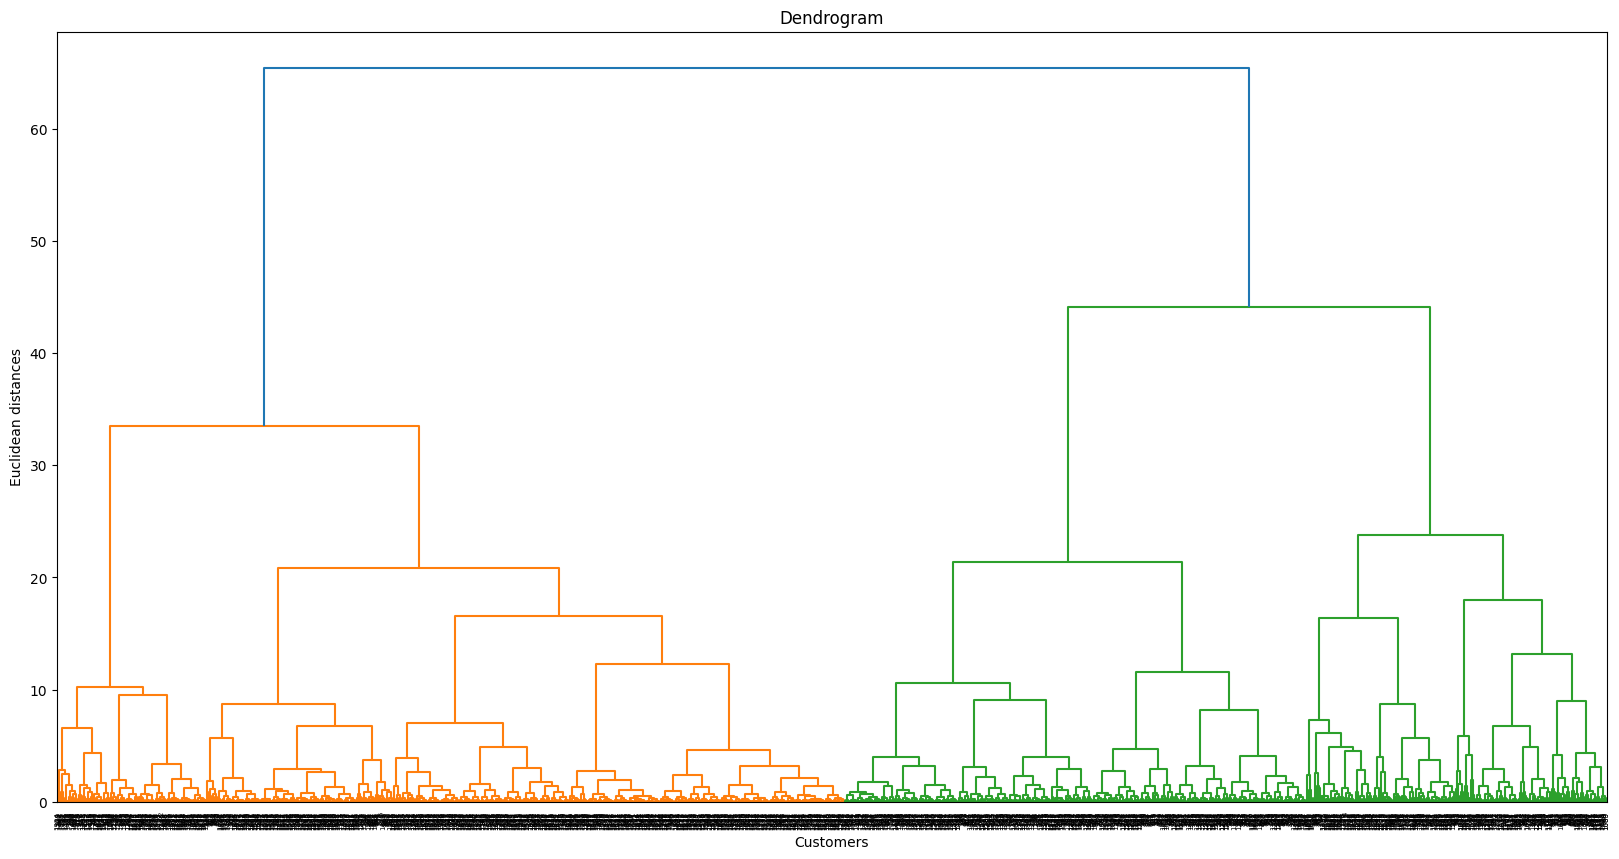

In [7]:
plt.figure(figsize = (20, 10))
linked = linkage(scaled_features, method = 'ward')
dendrogram(linked, orientation = 'top', distance_sort = 'ascending', show_leaf_counts= False)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [8]:
n_clusters = 3
hierarchical_model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
clusters = hierarchical_model.fit_predict(scaled_features)

In [9]:
data['Cluster'] = clusters

In [10]:
scaled_df = pd.DataFrame(scaled_features, columns =['Age', 'Income', 'Settlement size'])
scaled_df['Cluster'] = clusters

In [11]:
fig = px.scatter_3d(
    scaled_df,
    x = 'Age', y = 'Income', z = 'Settlement size',
    color = 'Cluster',
    title = 'Customer Segment using Hierarchical Clustering',
    labels = {'Age': 'Age (Scaled)', 'Income':'Income (Scaled)', 'Settlement size':'Settlement size (Scaled)'},
    opacity = 0.8
)
fig.update_traces(marker = dict(size = 5))
fig.show()

In [12]:
sil_score = silhouette_score(scaled_features, clusters)
print(f"Silhouette Score: {sil_score:.3f}")

Silhouette Score: 0.341
